In [16]:
# Toy functions
def quadratic(x):
    return x**2, 2 * x
    
    

In [48]:
def sgd(x, lr=0.1, step=100):
    w = x
    ls = [w]
    for s in range(step):
        w += -lr*quadratic(w)[1]
        ls.append(w)
        
    return ls

In [202]:
def sgd_rb(wx, wy, lr=0.001, steps= 100):
    ls = []
    for s in range(steps):
        loss = rosenbrock1(wx,wy)[0]
        wx += -lr*rosenbrock1(wx,wy)[1]
        wy +=-lr*rosenbrock1(wx,wy)[2]
        ls.append(loss)
        

In [203]:
sgd_rb(0, 0)

### SGD

In [219]:
def sgd(x, lr=0.1, step=100):
    w = x
    ls = [w]
    for s in range(step):
        w += -lr*quadratic(w)[1]
        ls.append(w)
        
    return ls

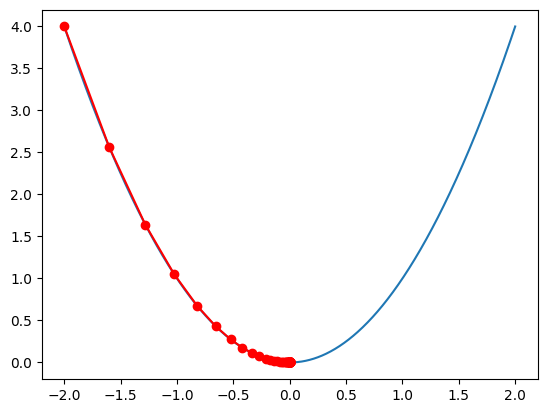

In [220]:
x = np.linspace(-2, 2, 1000)
y = [quadratic(i)[0] for i in x]
ls = sgd(-2.0)

plt.plot(x, y, label='loss')
plt.plot(ls, [quadratic(i)[0] for i in ls],'ro-', label='gradient')
plt.show()

## Momentum

In [254]:

def momentum_optimization(start_x, lr=0.1, gamma=0.9, steps=100):
    """
    Momentum optimization for the quadratic function.
    Args:
        start_x: Initial point
        lr: Learning rate
        gamma: Momentum factor
        steps: Number of iterations
    Returns:
        A list of values of x during the optimization.
    """
    x = start_x
    v = 0  # Initialize momentum
    trajectory = []  # To store x values
    
    for step in range(steps):
        # Calculate function value and gradient
        f_val, grad = quadratic(x)
        
        # Update momentum
        v = gamma * v - lr * grad
        
        # Update x
        x += v
        
        # Store trajectory
        trajectory.append(x)
        
        # Print progress
        print(f"Step {step+1}: x = {x}, f(x) = {f_val}, v = ", v)
    
    return trajectory

# Run momentum optimization
trajectory = momentum_optimization(start_x=-2, lr=0.1, gamma=0.5, steps=100)

Step 1: x = -1.6, f(x) = 4, v =  0.4
Step 2: x = -1.08, f(x) = 2.5600000000000005, v =  0.52
Step 3: x = -0.6040000000000001, f(x) = 1.1664, v =  0.47600000000000003
Step 4: x = -0.24520000000000008, f(x) = 0.3648160000000001, v =  0.3588
Step 5: x = -0.016760000000000053, f(x) = 0.060123040000000044, v =  0.22844000000000003
Step 6: x = 0.10081199999999997, f(x) = 0.0002808976000000018, v =  0.11757200000000002
Step 7: x = 0.1394356, f(x) = 0.010163059343999994, v =  0.038623600000000015
Step 8: x = 0.13086028, f(x) = 0.019442286547359997, v =  -0.008575319999999994
Step 9: x = 0.100400564, f(x) = 0.0171244128816784, v =  -0.030459715999999998
Step 10: x = 0.06509059319999999, f(x) = 0.010080273251518095, v =  -0.0353099708
Step 11: x = 0.034417489159999995, f(x) = 0.004236785323127885, v =  -0.03067310404
Step 12: x = 0.012197439307999998, f(x) = 0.0011845635600787172, v =  -0.022220049851999997
Step 13: x = -0.0013520734796000008, f(x) = 0.00014877752567234347, v =  -0.0135495127875

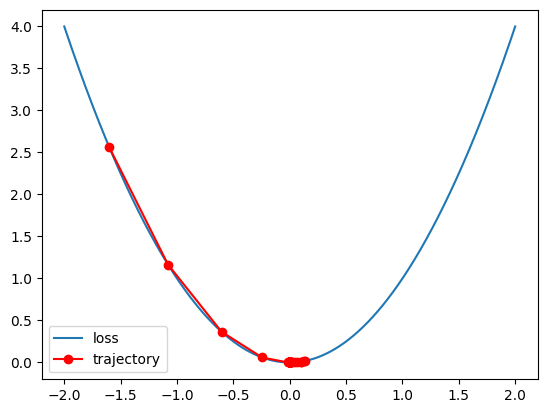

In [255]:
plt.plot(x,y, label='loss')
plt.plot(trajectory, [quadratic(i)[0] for i in trajectory],'ro-', label='trajectory' )
plt.legend()
plt.show()

In [239]:

def Adagrad(start_x, lr=0.1, gamma=0.9, steps=100):
    """
    Momentum optimization for the quadratic function.
    Args:
        start_x: Initial point
        lr: Learning rate
        gamma: Momentum factor
        steps: Number of iterations
    Returns:
        A list of values of x during the optimization.
    """
    x = start_x
    r = 0  # Initialize momentum
    trajectory = []  # To store x values
    
    for step in range(steps):
        # Calculate function value and gradient
        f_val, grad = quadratic(x)
        
        # Update momentum
        r = r + grad**2
#         v = gamma * v - lr * grad
        
        # Update x
        x = x - (lr/(r)**0.5)*grad
        
        # Store trajectory
        trajectory.append(x)
        
        # Print progress
        print(f"Step {step+1}: x = {x}, f(x) = {f_val}, r = ", r)
    
    return trajectory

# Run momentum optimization
trajectory = Adagrad(start_x=-2, lr=0.1, gamma=0.9, steps=1000)

Step 1: x = -1.9, f(x) = 4, r =  16
Step 2: x = -1.8311250538085306, f(x) = 3.61, r =  30.439999999999998
Step 3: x = -1.7758215150085808, f(x) = 3.353018962685294, r =  43.85207585074117
Step 4: x = -1.7285570377952049, f(x) = 3.1535420531673712, r =  56.466244063410656
Step 5: x = -1.6867615981278734, f(x) = 2.987909432911333, r =  68.41788179505599
Step 6: x = -1.6489968818333576, f(x) = 2.8451646889188975, r =  79.79854055073159
Step 7: x = -1.6143626690077324, f(x) = 2.7191907162961364, r =  90.67530341591613
Step 8: x = -1.58225153913929, f(x) = 2.606166827085769, r =  101.09997072425921
Step 9: x = -1.5522308240523939, f(x) = 2.503519933108652, r =  111.11405045669382
Step 10: x = -1.52397944750847, f(x) = 2.4094205311383736, r =  120.75173258124731
Step 11: x = -1.4972513748626026, f(x) = 2.3225133564282214, r =  130.0417860069602
Step 12: x = -1.4718531409903035, f(x) = 2.241761679527954, r =  139.008832725072
Step 13: x = -1.4476293504074673, f(x) = 2.1663516686430224, r =  1

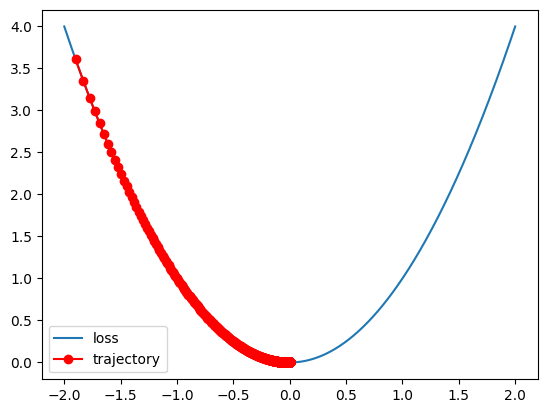

In [240]:
plt.plot(x,y, label='loss')
plt.plot(trajectory, [quadratic(i)[0] for i in trajectory],'ro-', label='trajectory' )
plt.legend()
plt.show()

### RMSprop

In [242]:

def RMSprop(start_x, lr=0.1, beta=0.9, steps=100):
    """
    Momentum optimization for the quadratic function.
    Args:
        start_x: Initial point
        lr: Learning rate
        gamma: Momentum factor
        steps: Number of iterations
    Returns:
        A list of values of x during the optimization.
    """
    x = start_x
    r = 0  # Initialize momentum
    trajectory = []  # To store x values
    
    for step in range(steps):
        # Calculate function value and gradient
        f_val, grad = quadratic(x)
        
        # Update momentum
        r = beta*r + (1-beta)*grad**2
#         v = gamma * v - lr * grad
        
        # Update x
        x = x - (lr/(r)**0.5)*grad
        
        # Store trajectory
        trajectory.append(x)
        
        # Print progress
        print(f"Step {step+1}: x = {x}, f(x) = {f_val}, r = ", r)
    
    return trajectory

# Run momentum optimization
trajectory = RMSprop(start_x=-2, lr=0.1, beta=0.9, steps=1000)

Step 1: x = -1.683772233983162, f(x) = 4, r =  1.5999999999999996
Step 2: x = -1.473875313498585, f(x) = 2.835088935932648, r =  2.5740355743730587
Step 3: x = -1.308717866949925, f(x) = 2.172308439740552, r =  3.1855553928319735
Step 4: x = -1.1698398109037538, f(x) = 1.7127424552739619, r =  3.552096835658361
Step 5: x = -1.0489273015417655, f(x) = 1.3685251831753305, r =  3.744297225362657
Step 6: x = -0.9414504875307664, f(x) = 1.1002484839196898, r =  3.809966896394267
Step 7: x = -0.8446493397033806, f(x) = 0.8863290204719178, r =  3.7835018149436075
Step 8: x = -0.7567142141226985, f(x) = 0.7134325070613569, r =  3.6905246362737896
Step 9: x = -0.6763956412312576, f(x) = 0.5726164018553331, r =  3.5505187333885435
Step 10: x = -0.6027968502941665, f(x) = 0.45751106347664416, r =  3.378471285440347
Step 11: x = -0.5352538817062759, f(x) = 0.3633640427245678, r =  3.1859697739861397
Step 12: x = -0.4732615348021278, f(x) = 0.28649671788163594, r =  2.98197148374018
Step 13: x = -0

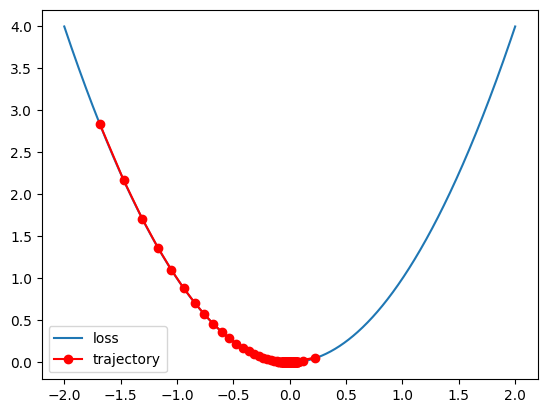

In [243]:
plt.plot(x,y, label='loss')
plt.plot(trajectory, [quadratic(i)[0] for i in trajectory],'ro-', label='trajectory' )
plt.legend()
plt.show()

In [244]:
### Adam

In [248]:

def Adam(start_x, lr=0.1, beta1=0.9,beta2=0.8, steps=100):
    """
    Momentum optimization for the quadratic function.
    Args:
        start_x: Initial point
        lr: Learning rate
        gamma: Momentum factor
        steps: Number of iterations
    Returns:
        A list of values of x during the optimization.
    """
    x = start_x
    m,v = 0,0
    trajectory = []  # To store x values
    
    for step in range(steps):
        # Calculate function value and gradient
        f_val, grad = quadratic(x)
        
        # Update momentum
        v = beta2*v + (1-beta2)*grad**2
        m = beta1*m + (1-beta1)*grad 
        m_hat = m/(1-beta1)
        v_hat = v/(1-beta2)
        
#         v = gamma * v - lr * grad
        
        # Update x
        x = x - (lr/(v_hat)**0.5)*m_hat
        
        # Store trajectory
        trajectory.append(x)
        
        # Print progress
        print(f"Step {step+1}: x = {x}, f(x) = {f_val}, v = ", v, 'm = ', m)
    
    return trajectory

# Run momentum optimization
trajectory = Adam(start_x=-2, steps=1000)

Step 1: x = -1.9, f(x) = 4, v =  3.1999999999999993 m =  -0.3999999999999999
Step 2: x = -1.7582156919307206, f(x) = 3.61, v =  5.447999999999999 m =  -0.7399999999999998
Step 3: x = -1.5840936276567477, f(x) = 3.0913224193514224, v =  6.8314579354811364 m =  -1.017643138386144
Step 4: x = -1.3824268982177506, f(x) = 2.509352621182715, v =  7.472648445331081 m =  -1.232697550078879
Step 5: x = -1.1562137970306396, f(x) = 1.911104128915951, v =  7.507002059397625 m =  -1.3859131747145412
Step 6: x = -0.9076201296324014, f(x) = 1.3368303444440093, v =  7.075065923073308 m =  -1.478564616649215
Step 7: x = -0.6385863484106611, f(x) = 0.823774299713937, v =  6.319072178229796 m =  -1.512232180910774
Step 8: x = -0.35158859378579005, f(x) = 0.40779252437646224, v =  5.381491762085007 m =  -1.488726232501829
Step 9: x = -0.05107852365047, f(x) = 0.12361453928026929, v =  4.404085041092221 m =  -1.410171328008804
Step 10: x = 0.25364759721429075, f(x) = 0.002609015578311623, v =  3.5253552453

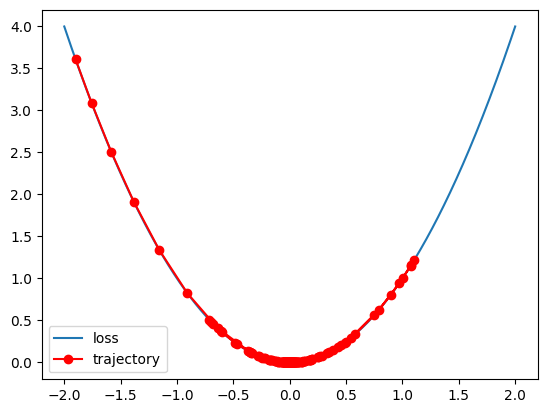

In [249]:
plt.plot(x,y, label='loss')
plt.plot(trajectory, [quadratic(i)[0] for i in trajectory],'ro-', label='trajectory' )
plt.legend()
plt.show()